In [1]:
import graspy
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In C:\Users\dfran\Miniconda3\envs\ndd_5\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\dfran\Miniconda3\envs\ndd_5\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\dfran\Miniconda3\envs\ndd_5\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\dfran\Miniconda3\envs\ndd_5\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\dfran\Miniconda3\envs\ndd_5\lib\

In [2]:
from graspy.simulations import sbm

n_communities = [50, 50, 50]
p = [[0.5, 0.1, 0.05],
     [0.1, 0.4, 0.15],
     [0.05, 0.15, 0.3],]

np.random.seed(2)
A = sbm(n_communities, p)
from graspy.embed import AdjacencySpectralEmbed

ase = AdjacencySpectralEmbed()
X = ase.fit_transform(A)

In [3]:
X.shape

(150, 3)

# One GMM Fit for all data on all axes

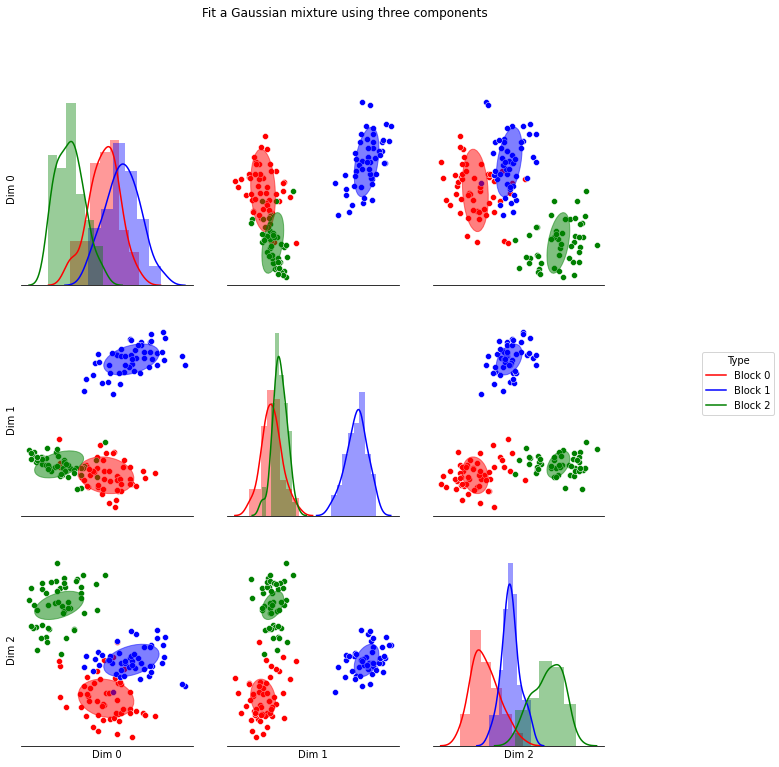

In [4]:
import itertools
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.mixture import GaussianMixture
import seaborn as sns

color_iter = {0:'red', 1: 'blue', 2: 'green', 3: 'purple', 4:'pink'}


def plot_results(X, gmm):
    f, axes = plt.subplots(X.shape[1],X.shape[1], figsize=(12, 12))    
    sns.despine(left=True)
    counter = 1
    Y_, means, covariances = gmm.predict(X), gmm.means_, gmm.covariances_
    for k in range(X.shape[1]):
        for j in range(X.shape[1]):            
            if k == j:
                for t in range(X.shape[1]):
                    sns.distplot(X[Y_ == t, k], kde=True, color=color_iter[t], ax=axes[k, k])
                axes[k,j].set_xticks([])
                axes[k,j].set_yticks([])
                axes[k,j].set_ylabel(None)
                axes[k,j].set_ylabel(j)
                axes[k,j].set_xlabel(k)
            else:                 
                for i, (mean, covar) in enumerate(zip(
                        means, covariances)):                   
                    v, w = linalg.eigh(covar)
                    v = 2. * np.sqrt(2.) * np.sqrt(v)
                    u = w[0] / linalg.norm(w[0])                    
                    # as the DP will not use every component it has access to
                    # unless it needs it, we shouldn't plot the redundant
                    # components.
                    if not np.any(Y_ == i):
                        
                        continue
                    sns.scatterplot(X[Y_ == i, j], X[Y_ == i, k], color=color_iter[i],ax=axes[k,j] )

                    # Plot an ellipse to show the Gaussian component
                    angle = np.arctan(u[1] / u[0])
                    angle = 180. * angle / np.pi  # convert to degrees
                    ell = mpl.patches.Ellipse([mean[j], mean[k]], v[0], v[1], 180. + angle, color=color_iter[i])
                    ell.set_clip_box(axes[k,j].bbox)
                    ell.set_alpha(0.5)
                    axes[k,j].add_artist(ell)
                    axes[k,j].set_xticks([])
                    axes[k,j].set_yticks([])
                    axes[k,j].set_ylabel(k)
                    axes[k,j].set_xlabel(k)
    for i in range(X.shape[1]):
        for j in range(X.shape[1]):
            axes[i,j].set_ylabel("Dim " + str(i))
            axes[i,j].set_xlabel("Dim " + str(j))

    for ax in axes.flat:
        ax.label_outer()
    f.suptitle("Fit a Gaussian mixture using three components")
    f.legend(labels=['Block {}'.format(i) for i in range(X.shape[1])],
       loc="right",   # Position of legend
     # Small spacing around legend box
       title="Type"  # Title for the legend
       )
    plt.subplots_adjust(right=.8)
   
#Fit a Gaussian mixture with EM using three components
gmm = GaussianMixture(n_components=X.shape[1], covariance_type='full').fit(X)
plot_results(X, gmm)

# Forming only Scatter plot when data is 2D

<Figure size 432x288 with 0 Axes>

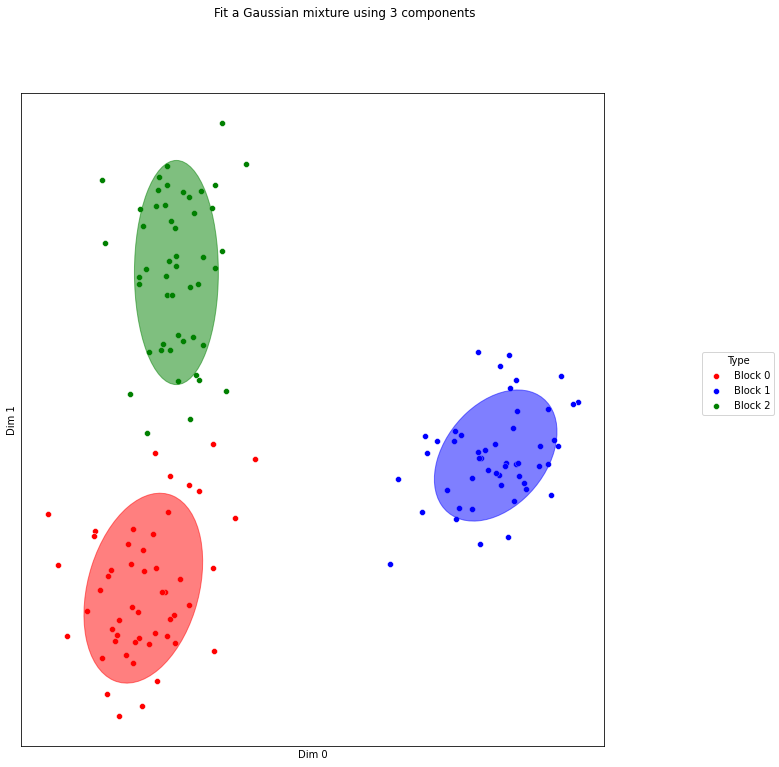

In [5]:
import itertools
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.mixture import GaussianMixture
import seaborn as sns
labels = ['Block 1'] * 50 + ['Block 2'] * 50 + ['Block 3'] * 50
color_iter = {0:'red', 1: 'blue', 2: 'green', 3: 'purple', 4:'pink'}
def plot_ellipse(X, Y_, means, covariances, ax, j, k):
    for i, (mean, covar) in enumerate(zip(means, covariances)):                   
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        if not np.any(Y_ == i):
            continue        
        sns.scatterplot(X[Y_ == i, j], X[Y_ == i, k], color=color_iter[i],ax = ax)        
        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi
        ell = mpl.patches.Ellipse([mean[j], mean[k]], v[0], v[1], 180. + angle, color=color_iter[i])
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_ylabel(k)
        ax.set_xlabel(k)

def plot_results(X, gmm):    
    sns.despine(left=True)
    #get relevant data from the gmm model 
    Y_, means, covariances = gmm.predict(X), gmm.means_, gmm.covariances_
    #plot only a scatter plot with only two feature columns 
    if X.shape[1] == 2:
        f, axes = plt.subplots(1,1, figsize=(12, 12)) 
        #keep same style where j is the x axis and k is the y axis
        plot_ellipse(X, Y_, means, covariances, axes, 0, 1)
        axes.set_ylabel("Dim " + str(1))
        axes.set_xlabel("Dim " + str(0))
        f.suptitle("Fit a Gaussian mixture using " + str(means.shape[0]) + " components")
        f.legend(labels=['Block {}'.format(i) for i in range(means.shape[0])], loc="right", title="Type")
        plt.subplots_adjust(right=.8)
        return 
    #for more than two features compared
    f, axes = plt.subplots(X.shape[1],X.shape[1], figsize=(12, 12))    
    for k in range(X.shape[1]):
        for j in range(X.shape[1]):            
            if k == j:
                for t in range(X.shape[1]):
                    sns.distplot(X[Y_ == t, k], kde=True, color=color_iter[t], ax=axes[k, k])
                axes[k,j].set_xticks([])
                axes[k,j].set_yticks([])
                axes[k,j].set_ylabel(None)
                axes[k,j].set_ylabel(j)
                axes[k,j].set_xlabel(k)
            else:               
                plot_ellipse(X, Y_, means, covariances, axes[k,j], j, k)
    for i in range(X.shape[1]):
        for j in range(X.shape[1]):
            axes[i,j].set_ylabel("Dim " + str(i))
            axes[i,j].set_xlabel("Dim " + str(j))
    for ax in axes.flat:
        ax.label_outer()
    f.suptitle("Fit a Gaussian mixture using " + str(means.shape[0]) + " components")
    f.legend(labels=['Block {}'.format(i) for i in range(X.shape[1])], loc="right", title="Type")
   
    plt.subplots_adjust(right=.8)

    
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(X[:, 1:])
plot_results(X[:, 1:], gmm)

In [6]:
if labels:
        set_labs = set(labels)
        lab_dict = {}
        counter = 0
        ind_to_lab = {}
        for lab in set_labs:
            lab_dict[lab] = counter
            ind_to_lab[counter] = lab 

# With labeled data 

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

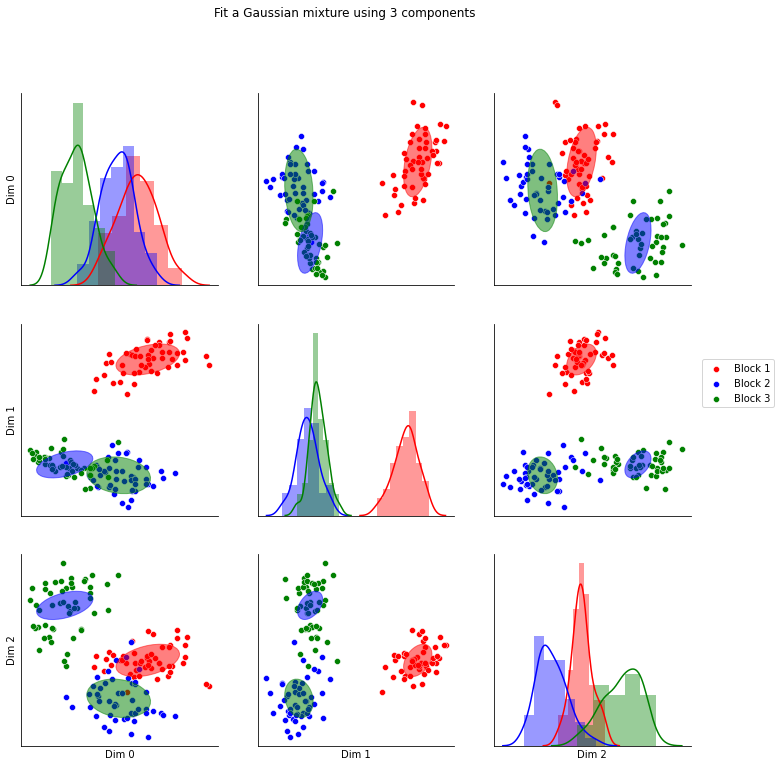

In [7]:
import itertools
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.mixture import GaussianMixture
import seaborn as sns
labels = ['Block 1'] * 50 + ['Block 2'] * 50 + ['Block 3'] * 50

def plot_ellipse(X, Y_, means, covariances, ax, j, k, colors, lab_dict = None, ind_to_lab = None):
    for i, (mean, covar, color) in enumerate(zip(means, covariances, colors)):                   
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        if lab_dict and ind_to_lab: 
            sns.scatterplot(X[Y_ == i, j], X[Y_ == i, k], color=color,ax = ax, label = ind_to_lab[i])  
            # Plot an ellipse to show the Gaussian component
            angle = np.arctan(u[1] / u[0])
            angle = 180. * angle / np.pi
            ell = mpl.patches.Ellipse([mean[j], mean[k]], v[0], v[1], 180. + angle, color=color)
        else: 
            if not np.any(Y_ == i):
                continue  
            sns.scatterplot(X[Y_ == i, j], X[Y_ == i, k], color=color,ax = ax, label = 'Block {}'.format(i) )        
            # Plot an ellipse to show the Gaussian component
            angle = np.arctan(u[1] / u[0])
            angle = 180. * angle / np.pi
            ell = mpl.patches.Ellipse([mean[j], mean[k]], v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_ylabel(k)
        ax.set_xlabel(k)

def plot_results(X, gmm, labels = None):    
    sns.despine(left=True)
    #get relevant data from the gmm model 
    Y_, means, covariances = gmm.predict(X), gmm.means_, gmm.covariances_   
    colors = ['red', 'blue', 'green', 'purple', 'pink', 'brown', 'orange']
    #plot only a scatter plot with only two feature columns 
    lab_dict = {}
    ind_to_lab = {}
    if labels:
        set_labs = set(labels)
        set_labs = sorted(set_labs)
        lab_dict = {}
        counter = 0
        ind_to_lab = {}
        for lab in set_labs:
            lab_dict[lab] = counter
            ind_to_lab[counter] = lab 
            counter += 1
        Y_ = [lab_dict[labels[i]] for i in range(len(labels))]
        Y_ = np.asarray(Y_)
        #labels = np.asarray(labels)
    if X.shape[1] == 2:
        f, axes = plt.subplots(1,1, figsize=(12, 12)) 
        #keep same style where j is the x axis and k is the y axis            
        plot_ellipse(X, Y_, means, covariances, axes, 0, 1,colors, lab_dict,  ind_to_lab)
        axes.set_ylabel("Dim " + str(0))
        axes.set_xlabel("Dim " + str(1))
        f.suptitle("Fit a Gaussian mixture using " + str(means.shape[0]) + " components")
        #f.legend(labels=['Block {}'.format(i) for i in range(means.shape[0])], loc="right", title="Type")
        plt.subplots_adjust(right=.8)
        return 
    #for more than two features compared
    f, axes = plt.subplots(X.shape[1],X.shape[1], figsize=(12, 12))    
    for k in range(X.shape[1]):
        for j in range(X.shape[1]):            
            if k == j:
                for t in range(X.shape[1]):
                    sns.distplot(X[Y_ == t, k], kde=True, color=colors[t], ax=axes[k, k])
                axes[k,j].set_xticks([])
                axes[k,j].set_yticks([])
                axes[k,j].set_ylabel(None)
                axes[k,j].set_ylabel(j)
                axes[k,j].set_xlabel(k)
            else:               
                plot_ellipse(X, Y_, means, covariances, axes[k,j], j, k, colors, lab_dict,  ind_to_lab)
    for i in range(X.shape[1]):
        for j in range(X.shape[1]):
            axes[i,j].set_ylabel("Dim " + str(i))
            axes[i,j].set_xlabel("Dim " + str(j))
    for ax in axes.flat:
        ax.label_outer()
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
    f.suptitle("Fit a Gaussian mixture using " + str(means.shape[0]) + " components")
    handles, labels = [], []
    for ax in axes.flat:
        legend = ax.legend()
        legend.remove()
        handles_, labels_ = ax.get_legend_handles_labels()
        handles += handles_
        labels += labels_
    f.legend(handles[:means.shape[0]], labels[:means.shape[0]], loc='center right')

    
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(X)
plot_results(X, gmm, labels)

# Clean up

In [14]:
import itertools
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

def plot_ellipse(X, Y_, means, covariances, ax, j, k, colors, lab_dict = None, ind_to_lab = None, alpha = .7):
    r"""
    plot_ellipse makes a scatter plot from the two dimensions j,k where j corresponds to x-axis 
    and k corresponds to the y-axis onto the axis that is ax. plot_ellipse then applies a gmm ellipse onto the scatterplot
    using the data from Y_, means, covariances. 
    
    Parameters
    ----------
    X : array-like, shape (n_samples, n_features)
        Input data.
    Y_ : array-like, shape (n_samples, 1)
        When no labels are passed into pairplot_with_gmm then these are the gmm lables.
        When labels are passed into pairplot_with_gmm then these are numbers that have corrsponding
        relationship to the labels
    means : array-like, shape (n_components, n_features)
        Estimated means from gmm 
    covariances : array-like, shape (with 'full') (n_components, n_features, n_features)
        estimated covariances from gmm
    ax : axis object
        The location where plot_ellipse will plot
    j : int 
        column index of feature of interest from X which will be the x-axis data. 
    k : int 
        column index of feature of interest from X which will be the y-axis data. 
    colors: array-like
    lab_dict : dict
        Dictionary of labels mapped to unique number
    ind_to_lab : dict
        The reverse of lab_dict         
    alpha : float, optional, default: 0.7
        Opacity value of plotter markers between 0 and 1
    """
    for i, (mean, covar, color) in enumerate(zip(means, covariances, colors)):                   
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        if lab_dict and ind_to_lab: 
            # Plot the scatter 
            sns.scatterplot(X[Y_ == i, j], X[Y_ == i, k], color=color,ax = ax, label = ind_to_lab[i])  
            # Plot an ellipse to show the Gaussian component
            angle = np.arctan(u[1] / u[0])
            angle = 180. * angle / np.pi
            ell = mpl.patches.Ellipse([mean[j], mean[k]], v[0], v[1], 180. + angle, color=color)
        else: 
            if not np.any(Y_ == i):
                continue  
            sns.scatterplot(X[Y_ == i, j], X[Y_ == i, k], color=color,ax = ax, label = 'Block {}'.format(i) )        
            # Plot an ellipse to show the Gaussian component
            angle = np.arctan(u[1] / u[0])
            angle = 180. * angle / np.pi
            ell = mpl.patches.Ellipse([mean[j], mean[k]], v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(alpha)
        ax.add_artist(ell)
        ax.set_xticks([]), ax.set_yticks([])
        ax.set_ylabel(k), ax.set_xlabel(k)

def pairplot_with_gmm(X, gmm, labels = None, title = None, context="talk", font_scale=1,alpha=0.7):  
    r"""
    Plot pairwise relationships in a dataset.

    By default, this function will create a grid of Axes such that each dimension
    in data will by shared in the y-axis across a single row and in the x-axis
    across a single column.

    The off-diagonal Axes show the pairwise relationships displayed as scatterplot.
    Using the inputted gmm an ellipse to show the Gaussian component will be plotted. 
    The diagonal Axes show the univariate distribution of the data for that
    dimension displayed as kernel density estimates (KDEs).

    Read more in the :ref:`tutorials <plot_tutorials>`
    Parameters
    ----------
    X : array-like, shape (n_samples, n_features)
        Input data.
    gmm: sklearn.mixture.GaussianMixture
    labels : array-like or list, shape (n_samples), optional
        Labels that correspond to each sample in X.
    title : str, optional, default: None
        Title of plot.
    context :  None, or one of {paper, notebook, talk (default), poster}
        The name of a preconfigured set.
    font_scale : float, optional, default: 1
        Separate scaling factor to independently scale the size of the font
        elements.
    alpha : float, optional, default: 0.7
        Opacity value of plotter markers between 0 and 1    
    """
    sns.despine(left=True)
    # Handle X
    if not isinstance(X, (list, np.ndarray)):
        msg = "X must be array-like, not {}.".format(type(X))
        raise TypeError(msg)

    # Handle labels
    if labels is not None:
        if not isinstance(labels, (list, np.ndarray)):
            msg = "Y must be array-like or list, not {}.".format(type(labels))
            raise TypeError(msg)
        elif X.shape[0] != len(labels):
            msg = "Expected length {}, but got length {} instead for Y.".format(
                X.shape[0], len(labels)
            )
            raise ValueError(msg)
    # Handle gmm
    if gmm is None: 
        msg = "You must input a sklearn.mixture.GaussianMixture"
        raise TypeError(msg)
    #get relevant features from the gmm model 
    Y_, means, covariances = gmm.predict(X), gmm.means_, gmm.covariances_   
    colors = ['red', 'blue', 'green', 'purple', 'pink', 'brown', 'orange']
    #plot only a scatter plot with only two feature columns 
    lab_dict, ind_to_lab = {}, {}
    if labels:
        set_labs = sorted(set(labels))
        counter = 0
        for lab in set_labs:
            lab_dict[lab] = counter
            ind_to_lab[counter] = lab 
            counter += 1
        Y_ = np.asarray([lab_dict[labels[i]] for i in range(len(labels))])
    with sns.plotting_context(context=context, font_scale=font_scale): 
        if X.shape[1] == 2:
            pairplot, axes = plt.subplots(1,1, figsize=(12, 12))          
            plot_ellipse(X, Y_, means, covariances, axes, 0, 1,colors, lab_dict,  ind_to_lab)
            axes.set_ylabel("Dim " + str(0))
            axes.set_xlabel("Dim " + str(1))
            axes.label_outer()   
            axes.spines['right'].set_visible(False)
            axes.spines['top'].set_visible(False)
            if title:
                pairplot.suptitle(title)
            else: 
                pairplot.suptitle("Fit a Gaussian mixture using " + str(means.shape[0]) + " components")
            plt.subplots_adjust(right=.8)
            return pairplot
        #for more than two features compared
        pairplot, axes = plt.subplots(X.shape[1],X.shape[1], figsize=(12, 12))    
        for k in range(X.shape[1]):
            for j in range(X.shape[1]):            
                if k == j:
                    for t in range(X.shape[1]):
                        sns.distplot(X[Y_ == t, k], kde=True, color=colors[t], ax=axes[k, k])
                    axes[k,j].set_xticks([]), axes[k,j].set_yticks([])
                    axes[k,j].set_ylabel(None)
                    axes[k,j].set_ylabel(j), axes[k,j].set_xlabel(k)
                else:               
                    plot_ellipse(X, Y_, means, covariances, axes[k,j], j, k, colors, lab_dict,  ind_to_lab)
        for i in range(X.shape[1]):
            for j in range(X.shape[1]):
                axes[i,j].set_ylabel("Dim " + str(i))
                axes[i,j].set_xlabel("Dim " + str(j))            
        if title:
            pairplot.suptitle(title)
        else: 
            pairplot.suptitle("Fit a Gaussian mixture using " + str(means.shape[0]) + " components")
        handles, labels = [], []
        for ax in axes.flat:
            ax.label_outer()   
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.legend().remove()
            handles_, labels_ = ax.get_legend_handles_labels()
            handles += handles_
            labels += labels_
        
        pairplot.legend(handles[:means.shape[0]], labels[:means.shape[0]], loc='upper right')
        return pairplot



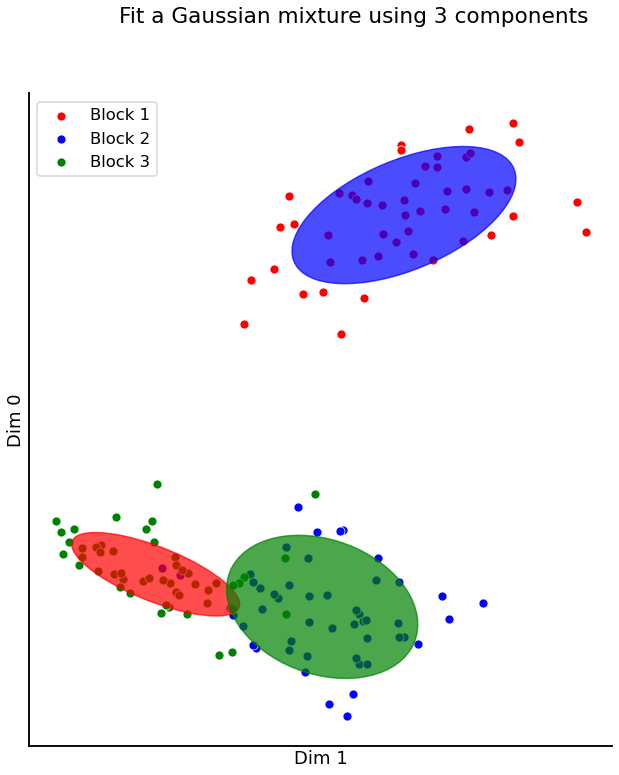

<Figure size 432x288 with 0 Axes>

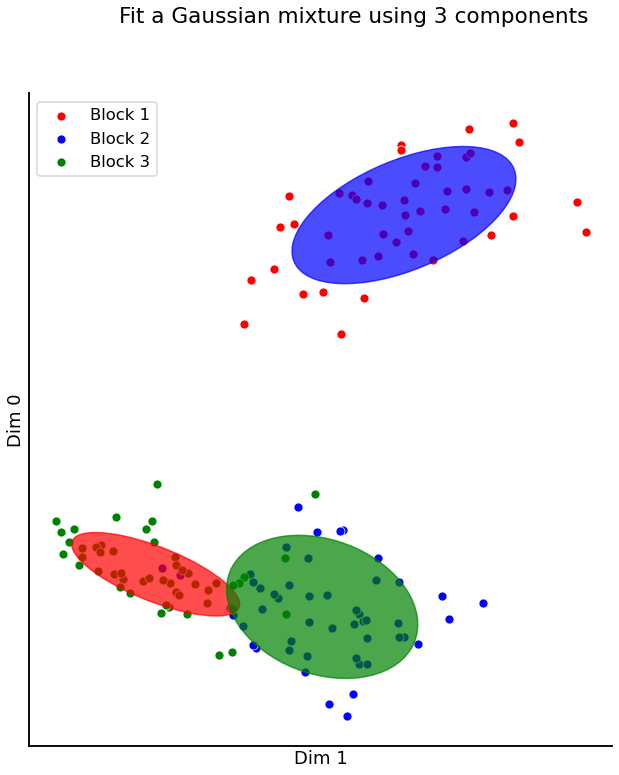

In [15]:
from sklearn.mixture import GaussianMixture
labels = ['Block 1'] * 50 + ['Block 2'] * 50 + ['Block 3'] * 50
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(X[:, :2])
pairplot_with_gmm(X[:, :2], gmm, labels = labels)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


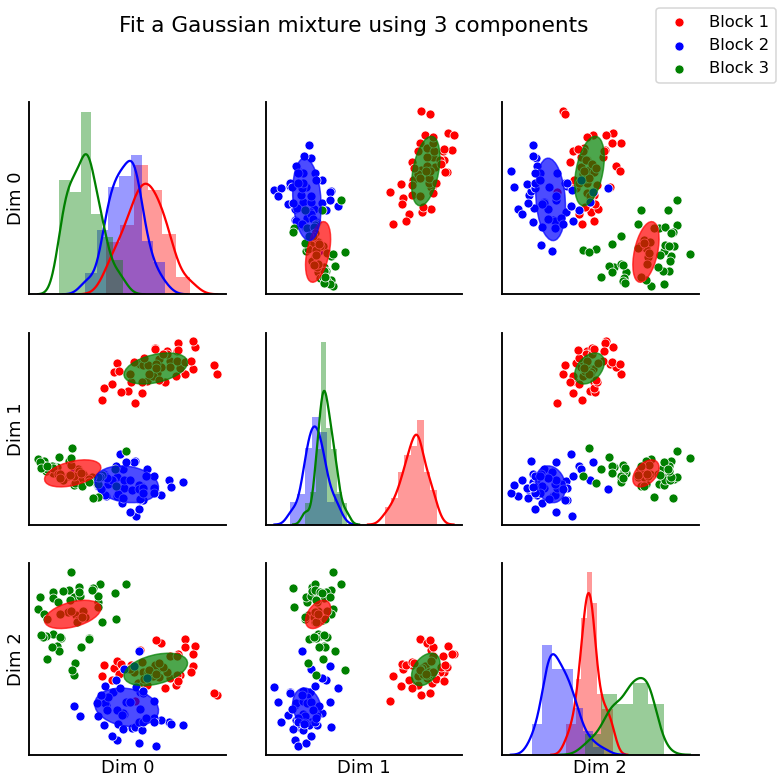

<Figure size 432x288 with 0 Axes>

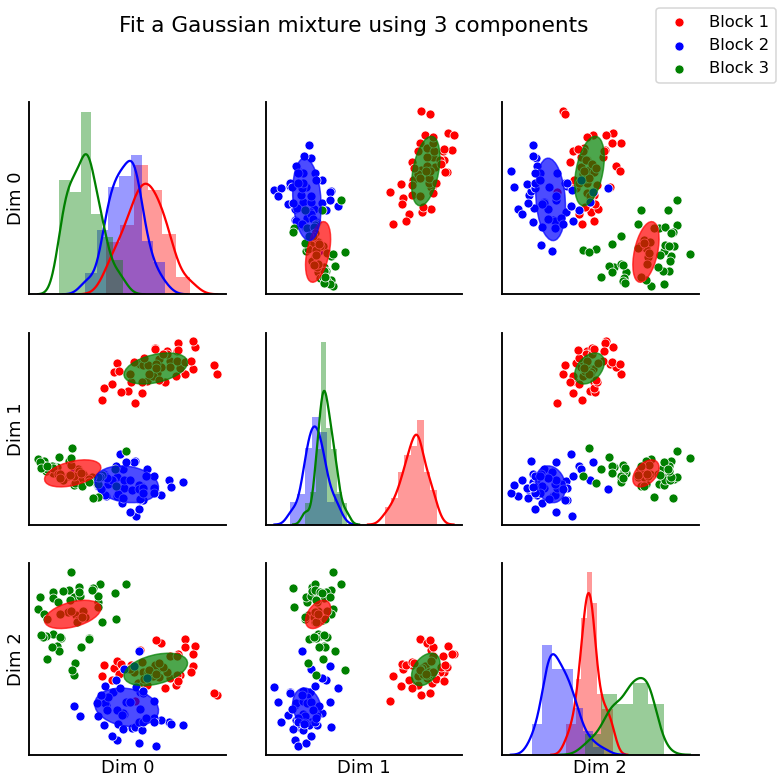

In [16]:
from sklearn.mixture import GaussianMixture
labels = ['Block 1'] * 50 + ['Block 2'] * 50 + ['Block 3'] * 50
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(X)
pairplot_with_gmm(X, gmm, labels = labels)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


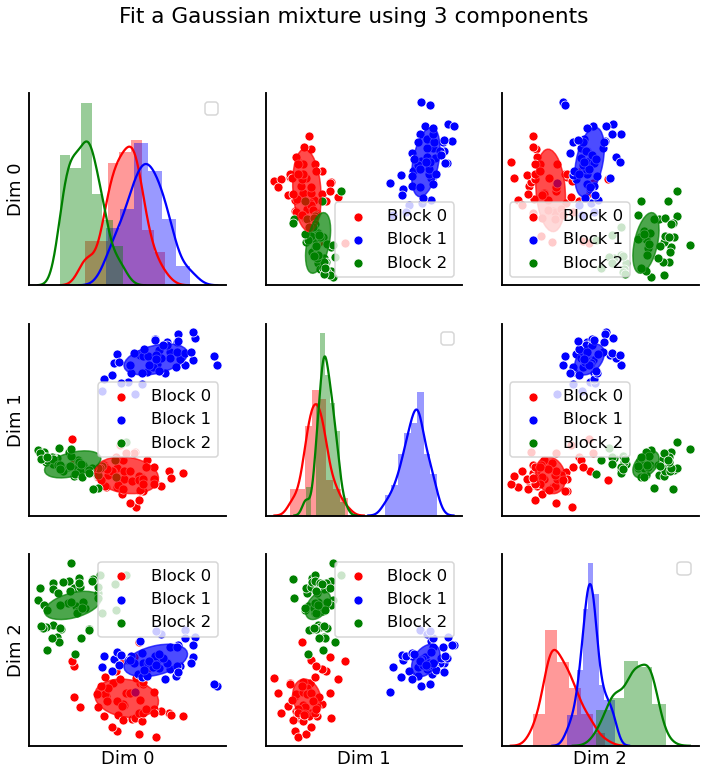

<Figure size 432x288 with 0 Axes>

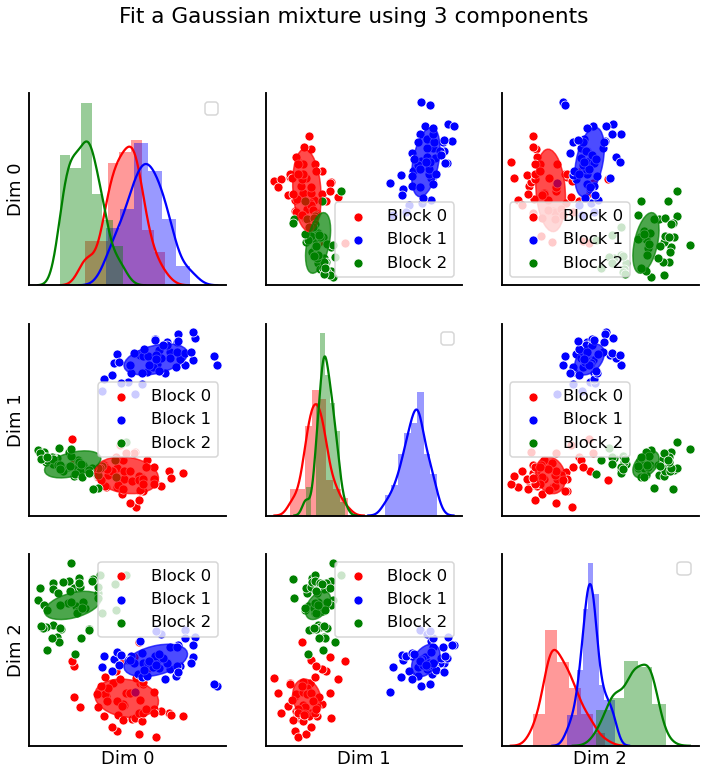

In [11]:
from sklearn.mixture import GaussianMixture
labels = ['Block 1'] * 50 + ['Block 2'] * 50 + ['Block 3'] * 50
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(X)
pairplot_with_gmm(X, gmm)

# Test functions 

In [36]:
import pytest
def test_pairplot_with_gmm_inputs_():
    X = np.random.rand(15, 3)
    gmm = GaussianMixture(n_components=3, covariance_type='full').fit(X)
    labels = ["A"] * 5 + ["B"] * 5 + ["C"] * 5
    # test data
    with pytest.raises(TypeError):
        pairplot_with_gmm(X="test", gmm=gmm)

    with pytest.raises(ValueError):
        pairplot_with_gmm(X=X, gmm=gmm, labels=["A"])

    with pytest.raises(TypeError):
        pairplot_with_gmm(X, gmm=None)

In [37]:
test_pairplot_with_gmm_inputs_()

<Figure size 432x288 with 0 Axes>

In [38]:
def test_pairplot_with_gmm_outputs():
    X = np.random.rand(15, 3)
    gmm = GaussianMixture(n_components=3, covariance_type='full').fit(X)
    labels = ["A"] * 5 + ["B"] * 5 + ["C"] * 5
    fig = pairplot_with_gmm(X, gmm)
    fig = pairplot_with_gmm(X, gmm, labels)
    fig = pairplot_with_gmm(
        X, gmm, labels, title="Test")


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

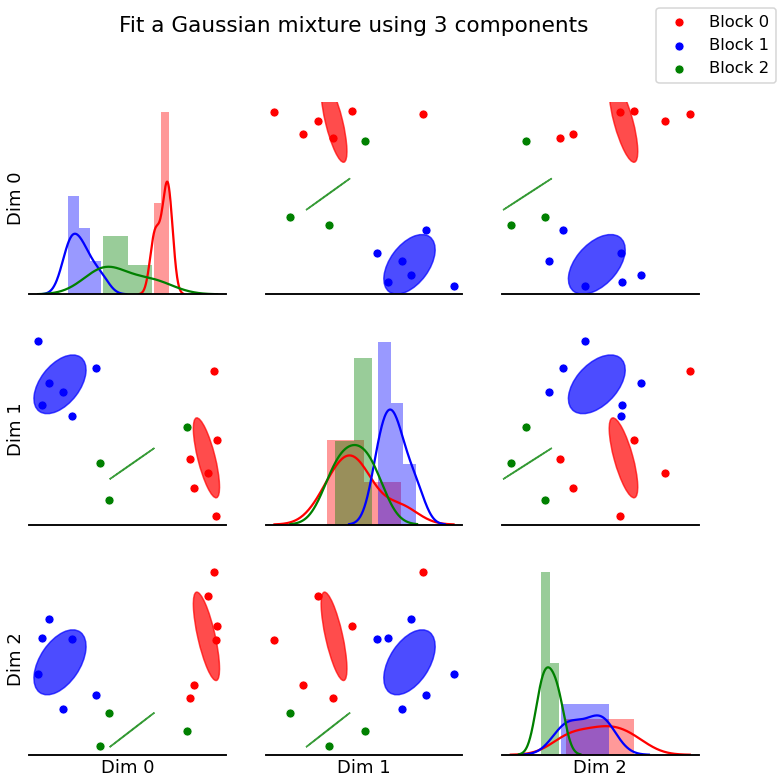

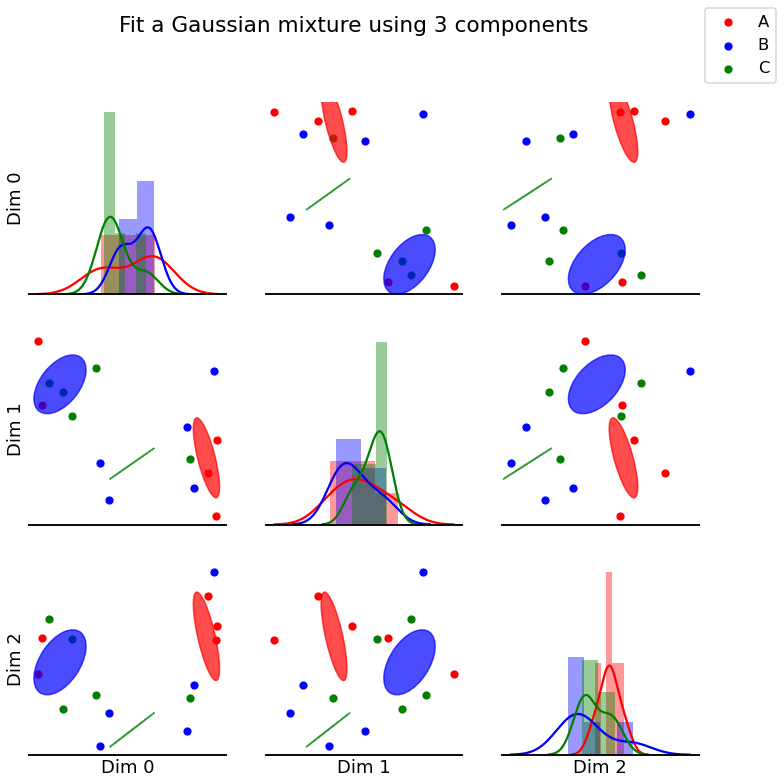

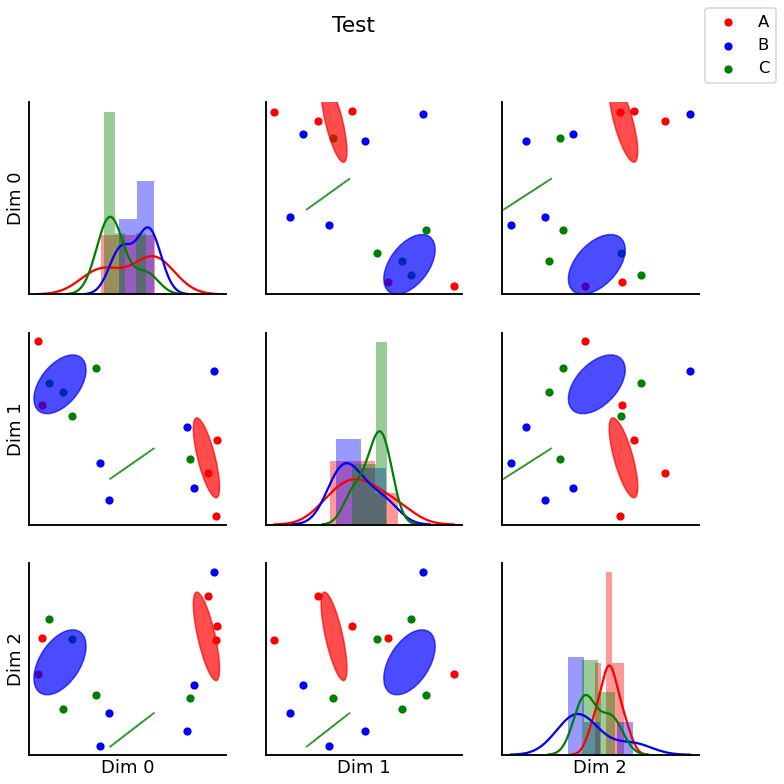

In [39]:
 test_pairplot_with_gmm_outputs()

# Using color palette

In [47]:
import itertools
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

def plot_ellipse(X, Y_, means, covariances, ax, j, k, lab_dict = None, ind_to_lab = None, alpha = .7, palette = 'Set1'):
    r"""
    plot_ellipse makes a scatter plot from the two dimensions j,k where j corresponds to x-axis 
    and k corresponds to the y-axis onto the axis that is ax. plot_ellipse then applies a gmm ellipse onto the scatterplot
    using the data from Y_, means, covariances. 
    
    Parameters
    ----------
    X : array-like, shape (n_samples, n_features)
        Input data.
    Y_ : array-like, shape (n_samples, 1)
        When no labels are passed into pairplot_with_gmm then these are the gmm lables.
        When labels are passed into pairplot_with_gmm then these are numbers that have corrsponding
        relationship to the labels
    means : array-like, shape (n_components, n_features)
        Estimated means from gmm 
    covariances : array-like, shape (with 'full') (n_components, n_features, n_features)
        estimated covariances from gmm
    ax : axis object
        The location where plot_ellipse will plot
    j : int 
        column index of feature of interest from X which will be the x-axis data. 
    k : int 
        column index of feature of interest from X which will be the y-axis data. 
    lab_dict : dict
        Dictionary of labels mapped to unique number
    ind_to_lab : dict
        The reverse of lab_dict         
    alpha : float, optional, default: 0.7
        Opacity value of plotter markers between 0 and 1
    """
    sns.color_palette(palette, as_cmap=True)
    for i, (mean, covar) in enumerate(zip(means, covariances)):                   
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        if lab_dict and ind_to_lab: 
            # Plot the scatter 
            sns.scatterplot(X[Y_ == i, j], X[Y_ == i, k],ax = ax, label = ind_to_lab[i])  
            # Plot an ellipse to show the Gaussian component
            angle = np.arctan(u[1] / u[0])
            angle = 180. * angle / np.pi
            ell = mpl.patches.Ellipse([mean[j], mean[k]], v[0], v[1], 180. + angle, color = 'red')
        else: 
            if not np.any(Y_ == i):
                continue  
            sns.scatterplot(X[Y_ == i, j], X[Y_ == i, k],ax = ax, label = 'Block {}'.format(i) )        
            # Plot an ellipse to show the Gaussian component
            angle = np.arctan(u[1] / u[0])
            angle = 180. * angle / np.pi
            ell = mpl.patches.Ellipse([mean[j], mean[k]], v[0], v[1], 180. + angle, color = 'red')
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(alpha)
        ax.add_artist(ell)
        ax.set_xticks([]), ax.set_yticks([])
        ax.set_ylabel(k), ax.set_xlabel(k)

def pairplot_with_gmm(X, gmm, labels = None, title = None, context="talk", font_scale=1,alpha=0.7, palette = 'Set1'):  
    r"""
    Plot pairwise relationships in a dataset.

    By default, this function will create a grid of Axes such that each dimension
    in data will by shared in the y-axis across a single row and in the x-axis
    across a single column.

    The off-diagonal Axes show the pairwise relationships displayed as scatterplot.
    Using the inputted gmm an ellipse to show the Gaussian component will be plotted. 
    The diagonal Axes show the univariate distribution of the data for that
    dimension displayed as kernel density estimates (KDEs).

    Read more in the :ref:`tutorials <plot_tutorials>`
    Parameters
    ----------
    X : array-like, shape (n_samples, n_features)
        Input data.
    gmm: sklearn.mixture.GaussianMixture
    labels : array-like or list, shape (n_samples), optional
        Labels that correspond to each sample in X.
    title : str, optional, default: None
        Title of plot.
    context :  None, or one of {paper, notebook, talk (default), poster}
        The name of a preconfigured set.
    font_scale : float, optional, default: 1
        Separate scaling factor to independently scale the size of the font
        elements.
    alpha : float, optional, default: 0.7
        Opacity value of plotter markers between 0 and 1    
    """
    sns.despine(left=True)
    sns.color_palette(palette, as_cmap=True)
    # Handle X
    if not isinstance(X, (list, np.ndarray)):
        msg = "X must be array-like, not {}.".format(type(X))
        raise TypeError(msg)

    # Handle labels
    if labels is not None:
        if not isinstance(labels, (list, np.ndarray)):
            msg = "Y must be array-like or list, not {}.".format(type(labels))
            raise TypeError(msg)
        elif X.shape[0] != len(labels):
            msg = "Expected length {}, but got length {} instead for Y.".format(
                X.shape[0], len(labels)
            )
            raise ValueError(msg)
    # Handle gmm
    if gmm is None: 
        msg = "You must input a sklearn.mixture.GaussianMixture"
        raise TypeError(msg)
    #get relevant features from the gmm model 
    Y_, means, covariances = gmm.predict(X), gmm.means_, gmm.covariances_  
    #plot only a scatter plot with only two feature columns 
    lab_dict, ind_to_lab = {}, {}
    if labels:
        set_labs = sorted(set(labels))
        counter = 0
        for lab in set_labs:
            lab_dict[lab] = counter
            ind_to_lab[counter] = lab 
            counter += 1
        Y_ = np.asarray([lab_dict[labels[i]] for i in range(len(labels))])
    with sns.plotting_context(context=context, font_scale=font_scale): 
        if X.shape[1] == 2:
            pairplot, axes = plt.subplots(1,1, figsize=(12, 12))          
            plot_ellipse(X, Y_, means, covariances, axes, 0, 1, lab_dict,  ind_to_lab,  palette = palette)
            axes.set_ylabel("Dim " + str(0))
            axes.set_xlabel("Dim " + str(1))
            axes.label_outer()   
            axes.spines['right'].set_visible(False)
            axes.spines['top'].set_visible(False)
            if title:
                pairplot.suptitle(title)
            else: 
                pairplot.suptitle("Fit a Gaussian mixture using " + str(means.shape[0]) + " components")
            plt.subplots_adjust(right=.8)
            return pairplot
        #for more than two features compared
        pairplot, axes = plt.subplots(X.shape[1],X.shape[1], figsize=(12, 12))    
        for k in range(X.shape[1]):
            for j in range(X.shape[1]):            
                if k == j:
                    for t in range(X.shape[1]):
                        sns.distplot(X[Y_ == t, k], kde=True, ax=axes[k, k])
                    axes[k,j].set_xticks([]), axes[k,j].set_yticks([])
                    axes[k,j].set_ylabel(None)
                    axes[k,j].set_ylabel(j), axes[k,j].set_xlabel(k)
                else:               
                    plot_ellipse(X, Y_, means, covariances, axes[k,j], j, k, lab_dict,  ind_to_lab, palette = palette)
        for i in range(X.shape[1]):
            for j in range(X.shape[1]):
                axes[i,j].set_ylabel("Dim " + str(i))
                axes[i,j].set_xlabel("Dim " + str(j))            
        if title:
            pairplot.suptitle(title)
        else: 
            pairplot.suptitle("Fit a Gaussian mixture using " + str(means.shape[0]) + " components")
        handles, labels = [], []
        for ax in axes.flat:
            ax.label_outer()   
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.legend().remove()
            handles_, labels_ = ax.get_legend_handles_labels()
            handles += handles_
            labels += labels_
        
        pairplot.legend(handles[:means.shape[0]], labels[:means.shape[0]], loc='upper right')
    return pairplot


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


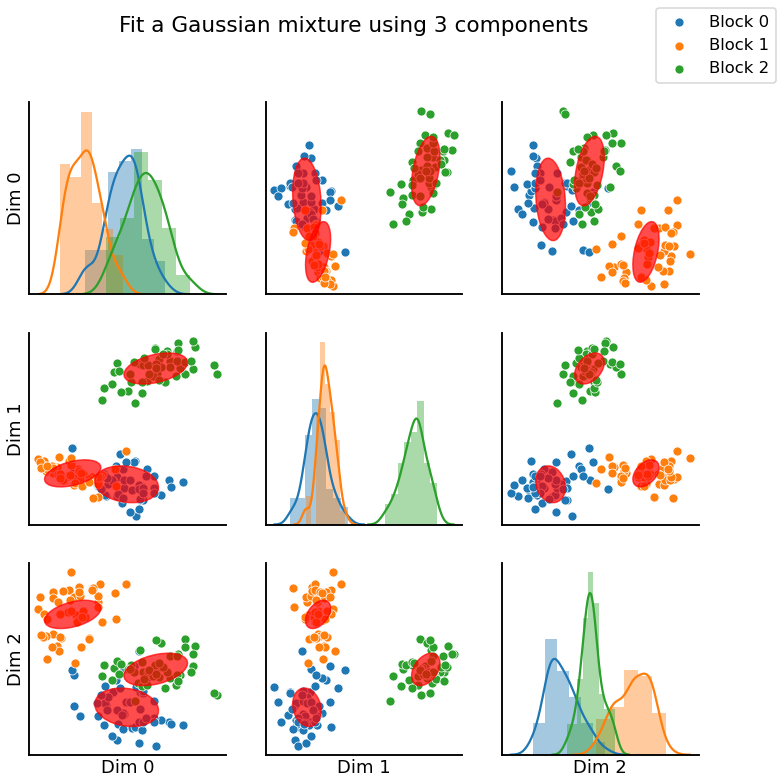

<Figure size 432x288 with 0 Axes>

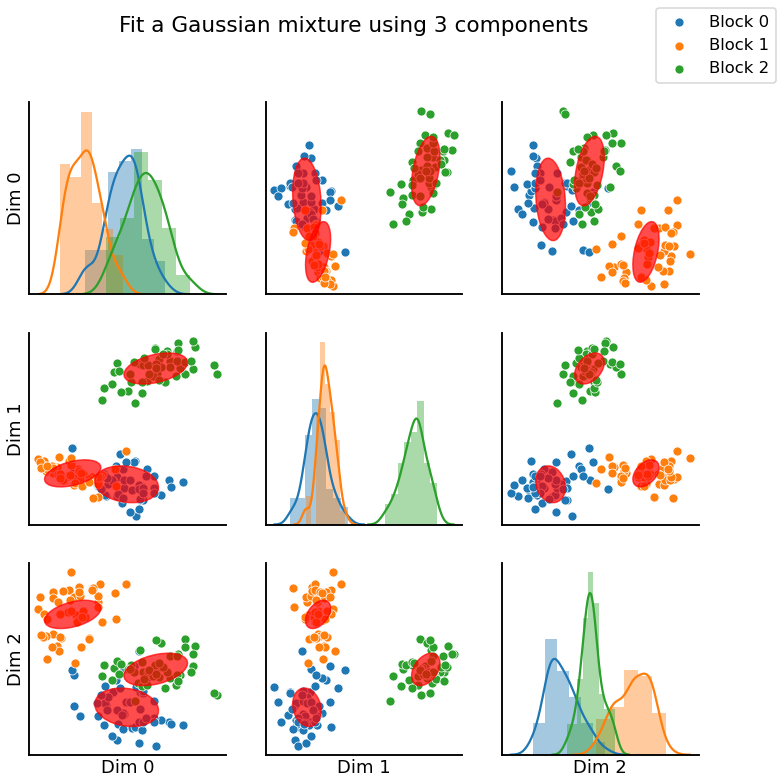

In [48]:
from sklearn.mixture import GaussianMixture
labels = ['Block 1'] * 50 + ['Block 2'] * 50 + ['Block 3'] * 50
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(X)
pairplot_with_gmm(X, gmm)

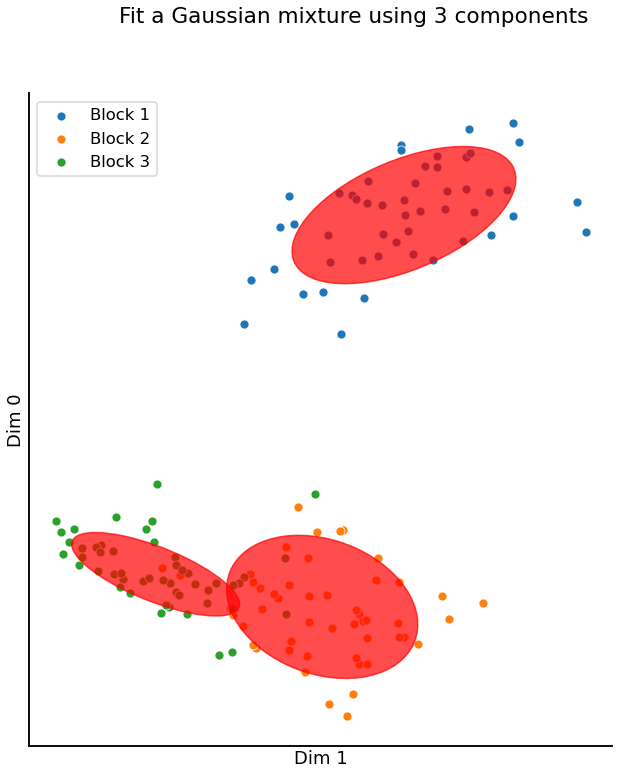

<Figure size 432x288 with 0 Axes>

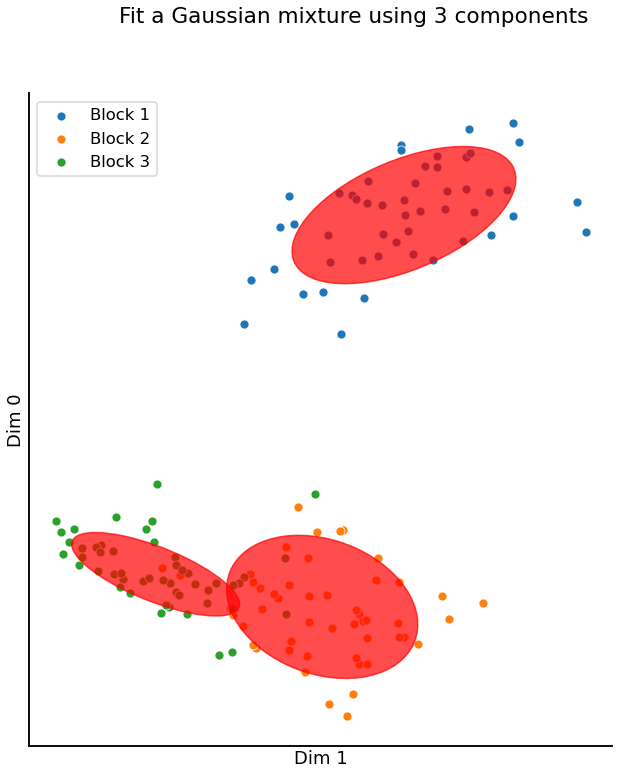

In [41]:
from sklearn.mixture import GaussianMixture
labels = ['Block 1'] * 50 + ['Block 2'] * 50 + ['Block 3'] * 50
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(X[:, :2])
pairplot_with_gmm(X[:, :2], gmm, labels = labels)

# Reformatted with black 

In [ ]:
def plot_ellipse(
    X,
    Y_,
    means,
    covariances,
    ax,
    j,
    k,
    lab_dict=None,
    ind_to_lab=None,
    alpha=0.7,
    palette="Set1",
):
    r"""
    plot_ellipse makes a scatter plot from the two dimensions j,k where j
    corresponds to x-axis
    and k corresponds to the y-axis onto the axis that is ax. plot_ellipse then
    applies a gmm ellipse onto the scatterplot
    using the data from Y_, means, covariances.

    Parameters
    ----------
    X : array-like, shape (n_samples, n_features)
        Input data.
    Y_ : array-like, shape (n_samples, 1)
        When no labels are passed into pairplot_with_gmm then these are the gmm
        lables.
        When labels are passed into pairplot_with_gmm then these are numbers
        that have corrsponding
        relationship to the labels
    means : array-like, shape (n_components, n_features)
        Estimated means from gmm
    covariances : array-like, shape (with 'full') (n_components, n_features, n_features)
        estimated covariances from gmm
    ax : axis object
        The location where plot_ellipse will plot
    j : int
        column index of feature of interest from X which will be the x-axis data.
    k : int
        column index of feature of interest from X which will be the y-axis data.
    lab_dict : dict
        Dictionary of labels mapped to unique number
    ind_to_lab : dict
        The reverse of lab_dict
    alpha : float, optional, default: 0.7
        Opacity value of plotter markers between 0 and 1
    palette : str, dict, optional, default: 'Set1'
    """
    sns.color_palette(palette, as_cmap=True)
    for i, (mean, covar) in enumerate(zip(means, covariances)):
        v, w = linalg.eigh(covar)
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        if lab_dict and ind_to_lab:
            # Plot the scatter
            sns.scatterplot(X[Y_ == i, j], X[Y_ == i, k], ax=ax, label=ind_to_lab[i])
            # Plot an ellipse to show the Gaussian component
            angle = np.arctan(u[1] / u[0])
            angle = 180.0 * angle / np.pi
            ell = mpl.patches.Ellipse(
                [mean[j], mean[k]], v[0], v[1], 180.0 + angle, color="red"
            )
        else:
            if not np.any(Y_ == i):
                continue
            sns.scatterplot(
                X[Y_ == i, j], X[Y_ == i, k], ax=ax, label="Block {}".format(i)
            )
            # Plot an ellipse to show the Gaussian component
            angle = np.arctan(u[1] / u[0])
            angle = 180.0 * angle / np.pi
            ell = mpl.patches.Ellipse(
                [mean[j], mean[k]], v[0], v[1], 180.0 + angle, color="red"
            )
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(alpha)
        ax.add_artist(ell)
        ax.set_xticks([]), ax.set_yticks([])
        ax.set_ylabel(k), ax.set_xlabel(k)


def pairplot_with_gmm(
    X,
    gmm,
    labels=None,
    title=None,
    context="talk",
    font_scale=1,
    alpha=0.7,
    palette="Set1",
):
    r"""
    Plot pairwise relationships in a dataset.

    By default, this function will create a grid of Axes such that each dimension
    in data will by shared in the y-axis across a single row and in the x-axis
    across a single column.

    The off-diagonal Axes show the pairwise relationships displayed as scatterplot.
    Using the inputted gmm an ellipse to show the Gaussian component will be plotted.
    The diagonal Axes show the univariate distribution of the data for that
    dimension displayed as kernel density estimates (KDEs).

    Read more in the :ref:`tutorials <plot_tutorials>`
    Parameters
    ----------
    X : array-like, shape (n_samples, n_features)
        Input data.
    gmm: sklearn.mixture.GaussianMixture
    labels : array-like or list, shape (n_samples), optional
        Labels that correspond to each sample in X.
    title : str, optional, default: None
        Title of plot.
    context :  None, or one of {paper, notebook, talk (default), poster}
        The name of a preconfigured set.
    font_scale : float, optional, default: 1
        Separate scaling factor to independently scale the size of the font
        elements.
    alpha : float, optional, default: 0.7
        Opacity value of plotter markers between 0 and 1
    palette : str, dict, optional, default: 'Set1'
    """
    sns.despine(left=True)
    sns.color_palette(palette, as_cmap=True)
    # Handle X
    if not isinstance(X, (list, np.ndarray)):
        msg = "X must be array-like, not {}.".format(type(X))
        raise TypeError(msg)

    # Handle labels
    if labels is not None:
        if not isinstance(labels, (list, np.ndarray)):
            msg = "Y must be array-like or list, not {}.".format(type(labels))
            raise TypeError(msg)
        elif X.shape[0] != len(labels):
            msg = "Expected length {}, but got length {} instead for Y.".format(
                X.shape[0], len(labels)
            )
            raise ValueError(msg)
    # Handle gmm
    if gmm is None:
        msg = "You must input a sklearn.mixture.GaussianMixture"
        raise TypeError(msg)
    # get relevant features from the gmm model
    Y_, means, covariances = gmm.predict(X), gmm.means_, gmm.covariances_
    # plot only a scatter plot with only two feature columns
    lab_dict, ind_to_lab = {}, {}
    if labels:
        set_labs = sorted(set(labels))
        counter = 0
        for lab in set_labs:
            lab_dict[lab] = counter
            ind_to_lab[counter] = lab
            counter += 1
        Y_ = np.asarray([lab_dict[labels[i]] for i in range(len(labels))])
    with sns.plotting_context(context=context, font_scale=font_scale):
        if X.shape[1] == 2:
            pairplot, axes = plt.subplots(1, 1, figsize=(12, 12))
            plot_ellipse(
                X,
                Y_,
                means,
                covariances,
                axes,
                0,
                1,
                lab_dict,
                ind_to_lab,
                palette=palette,
            )
            axes.set_ylabel("Dim " + str(0))
            axes.set_xlabel("Dim " + str(1))
            axes.label_outer()
            axes.spines["right"].set_visible(False)
            axes.spines["top"].set_visible(False)
            if title:
                pairplot.suptitle(title)
            else:
                pairplot.suptitle(
                    "Fit a Gaussian mixture using "
                    + str(means.shape[0])
                    + " components"
                )
            plt.subplots_adjust(right=0.8)
            return pairplot
        # for more than two features compared
        pairplot, axes = plt.subplots(X.shape[1], X.shape[1], figsize=(12, 12))
        for k in range(X.shape[1]):
            for j in range(X.shape[1]):
                if k == j:
                    for t in range(X.shape[1]):
                        sns.distplot(X[Y_ == t, k], kde=True, ax=axes[k, k])
                    axes[k, j].set_xticks([]), axes[k, j].set_yticks([])
                    axes[k, j].set_ylabel(None)
                    axes[k, j].set_ylabel(j), axes[k, j].set_xlabel(k)
                else:
                    plot_ellipse(
                        X,
                        Y_,
                        means,
                        covariances,
                        axes[k, j],
                        j,
                        k,
                        lab_dict,
                        ind_to_lab,
                        palette=palette,
                    )
        for i in range(X.shape[1]):
            for j in range(X.shape[1]):
                axes[i, j].set_ylabel("Dim " + str(i))
                axes[i, j].set_xlabel("Dim " + str(j))
        if title:
            pairplot.suptitle(title)
        else:
            pairplot.suptitle(
                "Fit a Gaussian mixture using " + str(means.shape[0]) + " components"
            )
        handles, labels = [], []
        for ax in axes.flat:
            ax.label_outer()
            ax.spines["right"].set_visible(False)
            ax.spines["top"].set_visible(False)
            ax.legend().remove()
            handles_, labels_ = ax.get_legend_handles_labels()
            handles += handles_
            labels += labels_

        pairplot.legend(
            handles[: means.shape[0]], labels[: means.shape[0]], loc="upper right"
        )
    return pairplot
